In [1]:
import networkx as nx
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

Reading the graphml file of the existing graph and taking it into memory using networkx

In [2]:
filename = "./trimmed_merged_pull_users_strong_int_with_communities.graphml"
G = nx.read_graphml(filename)

Some color description for the pie charts coming up later.

In [3]:
cnames = {
'aliceblue':            '#F0F8FF',
'antiquewhite':         '#FAEBD7',
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'azure':                '#F0FFFF',
'beige':                '#F5F5DC',
'bisque':               '#FFE4C4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chartreuse':           '#7FFF00',
'chocolate':            '#D2691E',
'coral':                '#FF7F50',
'cornflowerblue':       '#6495ED',
'cornsilk':             '#FFF8DC',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkgoldenrod':        '#B8860B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkmagenta':          '#8B008B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darkorchid':           '#9932CC',
'darkred':              '#8B0000',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'goldenrod':            '#DAA520',
'gray':                 '#808080',
'green':                '#008000',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'lavender':             '#E6E6FA',
'lavenderblush':        '#FFF0F5',
'lawngreen':            '#7CFC00',
'lemonchiffon':         '#FFFACD',
'lightblue':            '#ADD8E6',
'lightcoral':           '#F08080',
'lightcyan':            '#E0FFFF',
'lightgoldenrodyellow': '#FAFAD2',
'lightgreen':           '#90EE90',
'lightgray':            '#D3D3D3',
'lightpink':            '#FFB6C1',
'lightsalmon':          '#FFA07A',
'lightseagreen':        '#20B2AA',
'lightskyblue':         '#87CEFA',
'lightslategray':       '#778899',
'lightsteelblue':       '#B0C4DE',
'lightyellow':          '#FFFFE0',
'lime':                 '#00FF00',
'limegreen':            '#32CD32',
'linen':                '#FAF0E6',
'magenta':              '#FF00FF',
'maroon':               '#800000',
'mediumaquamarine':     '#66CDAA',
'mediumblue':           '#0000CD',
'mediumorchid':         '#BA55D3',
'mediumpurple':         '#9370DB',
'mediumseagreen':       '#3CB371',
'mediumslateblue':      '#7B68EE',
'mediumspringgreen':    '#00FA9A',
'mediumturquoise':      '#48D1CC',
'mediumvioletred':      '#C71585',
'midnightblue':         '#191970',
'mintcream':            '#F5FFFA',
'mistyrose':            '#FFE4E1',
'moccasin':             '#FFE4B5',
'navajowhite':          '#FFDEAD',
'navy':                 '#000080',
'oldlace':              '#FDF5E6',
'olive':                '#808000',
'olivedrab':            '#6B8E23',
'orange':               '#FFA500',
'orangered':            '#FF4500',
'orchid':               '#DA70D6',
'palegoldenrod':        '#EEE8AA',
'palegreen':            '#98FB98',
'paleturquoise':        '#AFEEEE',
'palevioletred':        '#DB7093',
'papayawhip':           '#FFEFD5',
'peachpuff':            '#FFDAB9',
'peru':                 '#CD853F',
'pink':                 '#FFC0CB',
'plum':                 '#DDA0DD',
'powderblue':           '#B0E0E6',
'purple':               '#800080',
'red':                  '#FF0000',
'rosybrown':            '#BC8F8F',
'royalblue':            '#4169E1',
'saddlebrown':          '#8B4513',
'salmon':               '#FA8072',
'sandybrown':           '#FAA460',
'seagreen':             '#2E8B57',
'seashell':             '#FFF5EE',
'sienna':               '#A0522D',
'silver':               '#C0C0C0',
'skyblue':              '#87CEEB',
'slateblue':            '#6A5ACD',
'slategray':            '#708090',
'snow':                 '#FFFAFA',
'springgreen':          '#00FF7F',
'steelblue':            '#4682B4',
'tan':                  '#D2B48C',
'teal':                 '#008080',
'thistle':              '#D8BFD8',
'tomato':               '#FF6347',
'turquoise':            '#40E0D0',
'violet':               '#EE82EE',
'wheat':                '#F5DEB3',
'white':                '#FFFFFF',
'whitesmoke':           '#F5F5F5',
'yellow':               '#FFFF00',
'yellowgreen':          '#9ACD32'}

Now creating a dictionary where each key is a programming language and each value is the number of github users use it as a preferred language.

In [4]:
community_sizes_lang = Counter(nx.get_node_attributes(G,'lang').values())
print community_sizes_lang

Counter({u'JavaScript': 13512, u'Python': 9246, u'Ruby': 8627, u'PHP': 4672, u'Java': 4435, u'C': 2124, u'C++': 1630, u'Objective-C': 1374, u'C#': 1342, u'Go': 1196, u'Shell': 763, u'Perl': 750, u'Scala': 622, u'Haskell': 557, u'Clojure': 521, u'CSS': 481, u'Emacs Lisp': 289, u'R': 250, u'Erlang': 241, u'Lua': 236, u'Rust': 213, u'VimL': 195, u'CoffeeScript': 194, u'Groovy': 190, u'HTML': 180, u'Puppet': 130, u'OCaml': 124, u'Julia': 100, u'DM': 87, u'Common Lisp': 86, u'Swift': 84, u'D': 83, u'F#': 82, u'Dart': 81, u'TeX': 76, u'Haxe': 66, u'Elixir': 59, u'ActionScript': 43, u'ColdFusion': 31, u'Racket': 26, u'PowerShell': 23, u'TypeScript': 22, u'Makefile': 22, u'Scheme': 22, u'Matlab': 21, u'Perl6': 20, u'Arduino': 15, u'Pascal': 15, u'Nimrod': 14, u'Logos': 13, u'XQuery': 13, u'Coq': 12, u'Assembly': 11, u'FORTRAN': 10, u'Elm': 9, u'Visual Basic': 8, u'Smalltalk': 8, u'Kotlin': 7, u'XSLT': 7, u'Rebol': 6, u'Standard ML': 6, u'SQF': 6, u'Eiffel': 6, u'Vala': 6, u'LiveScript': 6, u'D

Now getting the percentage of top 9 languages used by those users and the percentage of languages used other than the top 9 languages

15.3181744415
[24.364823196350326, 16.67237679643688, 15.556196692933263, 8.424545143083831, 7.997187009755306, 3.8299944100834886, 2.9392141659303603, 2.4775952539805615, 2.4198928899868366]
['JavaScript 24.36%', 'Python 16.67%', 'Ruby 15.56%', 'PHP 8.42%', 'Java 8.00%', 'C 3.83%', 'C++ 2.94%', 'Objective-C 2.48%', 'C# 2.42%', 'Others 15.32%']


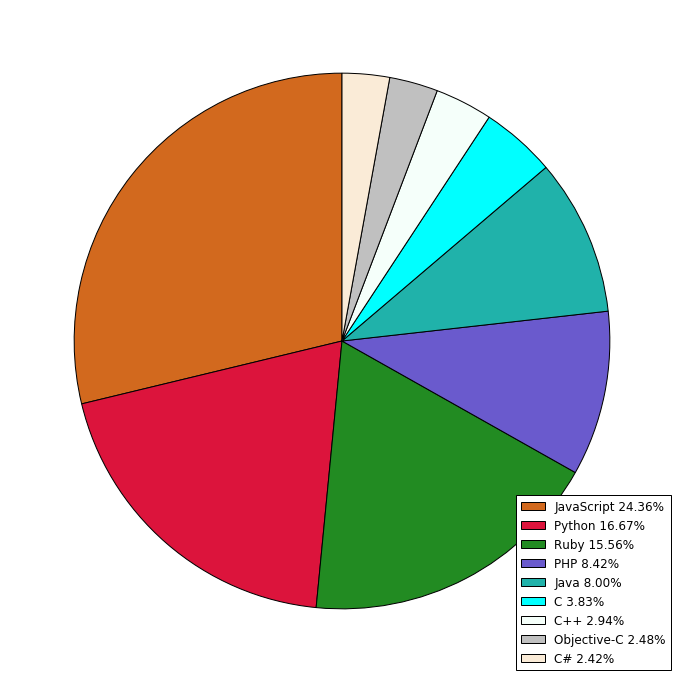

In [5]:
values_langs = sorted(community_sizes_lang.values(),reverse=True)[:9]
num_nodes = G.number_of_nodes()
values_langs= [x/float(num_nodes)*100 for x in values_langs]
others_percentage = 100 - sum(values_langs)
print others_percentage
print values_langs

sorted_langs = sorted(community_sizes_lang, key=community_sizes_lang.get, reverse = True)
labels_langs = list()
for i,percentage in enumerate(values_langs):
    labels_langs.append(str(sorted_langs[i]) +" "+ "%2.2f" %percentage+"%")
others_string = "Others"+" "+ "%2.2f" %others_percentage+"%"
labels_langs.append(others_string)
print labels_langs

fig = plt.figure(figsize=(12,12))

a=np.random.random(40)
cs=cm.Set1(np.arange(40)/40.)

cols = cnames.values()[39:63]

patches, texts = plt.pie([float(v) for v in values_langs], startangle=90,
           autopct=None, colors = cols)
plt.legend(patches, labels_langs, loc=4)
plt.show()

Now finding out the largest community detected by louvain algorithm

Now finding out the largest community detected by louvain algorithm and creating an induced graph of the largest community discovered by louvain algorithm. Seeing if there is a huge chunk of users who use a single language in that community.

Counter({8: 8281, 2: 7175, 6: 4602, 3: 4110, 1: 3494, 16: 2968, 7: 2572, 18: 2480, 0: 1929, 14: 1887, 17: 1553, 13: 1413, 4: 1394, 5: 1366, 10: 1310, 9: 1161, 22: 707, 11: 578, 15: 536, 21: 425, 31: 402, 24: 376, 34: 350, 25: 335, 27: 309, 37: 265, 20: 259, 28: 243, 12: 233, 23: 224, 26: 216, 19: 195, 39: 179, 32: 168, 43: 163, 35: 155, 33: 153, 38: 153, 36: 148, 40: 144, 30: 120, 29: 96, 45: 73, 49: 70, 48: 61, 44: 46, 41: 36, 51: 36, 52: 34, 42: 26, 55: 26, 59: 22, 47: 21, 57: 18, 53: 14, 56: 14, 46: 12, 60: 12, 61: 12, 62: 12, 66: 10, 68: 10, 54: 8, 50: 7, 67: 7, 58: 6, 63: 6, 64: 5, 70: 5, 71: 5, 73: 5, 65: 4, 72: 4, 69: 3})
[8, 2, 6, 3, 1, 16, 7, 18, 0, 14, 17, 13, 4, 5, 10, 9, 22, 11, 15, 21, 31, 24, 34, 25, 27, 37, 20, 28, 12, 23, 26, 19, 39, 32, 43, 35, 33, 38, 36, 40, 30, 29, 45, 49, 48, 44, 41, 51, 52, 42, 55, 59, 47, 57, 53, 56, 46, 60, 61, 62, 66, 68, 54, 50, 67, 58, 63, 64, 70, 71, 73, 65, 72, 69]
8281
Counter({u'JavaScript': 6453, u'Python': 419, u'Ruby': 282, u'PHP': 229

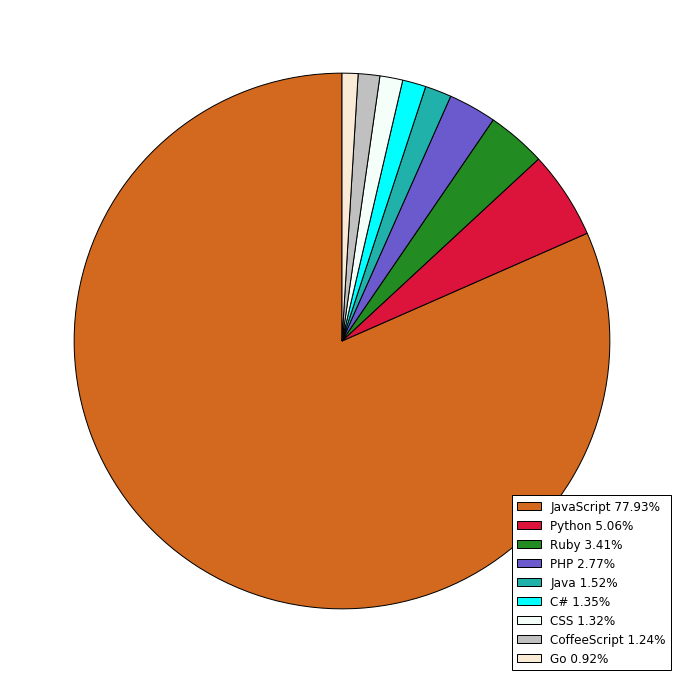

In [6]:
#Creating the list of vertices in largest louvain community
community_sizes_louvain = Counter(nx.get_node_attributes(G,'louvain_community').values())
print community_sizes_louvain
sorted_louvains = sorted(community_sizes_louvain, key = community_sizes_louvain.get, reverse = True)
print sorted_louvains
largest_community_louvain = [k for k,v in nx.get_node_attributes(G,'louvain_community').iteritems() if v == sorted_louvains[0]]
print len(largest_community_louvain)

## Inducing the subgraph of largest louvain community
subgraph_big_louvain = G.subgraph(largest_community_louvain)
community_sizes_lang = Counter(nx.get_node_attributes(subgraph_big_louvain,'lang').values())
num_nodes = subgraph_big_louvain.number_of_nodes()
print community_sizes_lang


## Creating pie-charts
values_langs = sorted(community_sizes_lang.values(),reverse=True)[:9]
values_langs= [x/float(num_nodes)*100 for x in values_langs]
others_percentage = 100 - sum(values_langs)
print others_percentage
print values_langs

sorted_langs = sorted(community_sizes_lang, key=community_sizes_lang.get, reverse = True)
labels_langs = list()
for i,percentage in enumerate(values_langs):
    labels_langs.append(str(sorted_langs[i]) +" "+ "%2.2f" %percentage+"%")
others_string = "Others"+" "+ "%2.2f" %others_percentage+"%"
labels_langs.append(others_string)
print labels_langs

fig = plt.figure(figsize=(12,12))

a=np.random.random(40)
cs=cm.Set1(np.arange(40)/40.)

cols = cnames.values()[39:63]

patches, texts = plt.pie([float(v) for v in values_langs], startangle=90,
           autopct=None, colors = cols)
plt.legend(patches, labels_langs, loc=4)
plt.show()

Now finding out the largest community detected by infomap algorithm and creating an induced graph of the largest community discovered by infomap algorithm. Seeing if there is a huge chunk of users who use a single language in that community.

Counter({0: 12609, 1: 11719, 2: 5034, 3: 4277, 5: 3167, 4: 2718, 6: 2310, 7: 1548, 8: 1122, 12: 869, 10: 818, 11: 781, 9: 756, 13: 514, 19: 509, 15: 411, 14: 361, 18: 338, 16: 335, 22: 308, 24: 231, 21: 227, 20: 223, 17: 221, 27: 215, 23: 169, 25: 169, 33: 168, 30: 165, 34: 161, 29: 154, 31: 143, 32: 129, 36: 118, 28: 117, 26: 112, 51: 99, 42: 94, 45: 93, 44: 86, 37: 81, 38: 75, 41: 74, 47: 73, 35: 69, 53: 68, 54: 64, 49: 60, 50: 59, 48: 57, 63: 57, 64: 56, 57: 55, 46: 53, 39: 52, 40: 52, 74: 47, 59: 44, 55: 43, 52: 40, 58: 39, 61: 38, 43: 37, 60: 37, 65: 35, 68: 35, 62: 34, 69: 33, 67: 29, 56: 28, 83: 27, 81: 24, 70: 23, 80: 23, 84: 21, 82: 20, 73: 18, 77: 17, 66: 16, 71: 16, 72: 16, 85: 13, 86: 13, 75: 12, 76: 12, 78: 12, 87: 10, 88: 9, 79: 8, 89: 7, 90: 7, 92: 6, 91: 5})
[0, 1, 2, 3, 5, 4, 6, 7, 8, 12, 10, 11, 9, 13, 19, 15, 14, 18, 16, 22, 24, 21, 20, 17, 27, 23, 25, 33, 30, 34, 29, 31, 32, 36, 28, 26, 51, 42, 45, 44, 37, 38, 41, 47, 35, 53, 54, 49, 50, 48, 63, 64, 57, 46, 39, 40, 

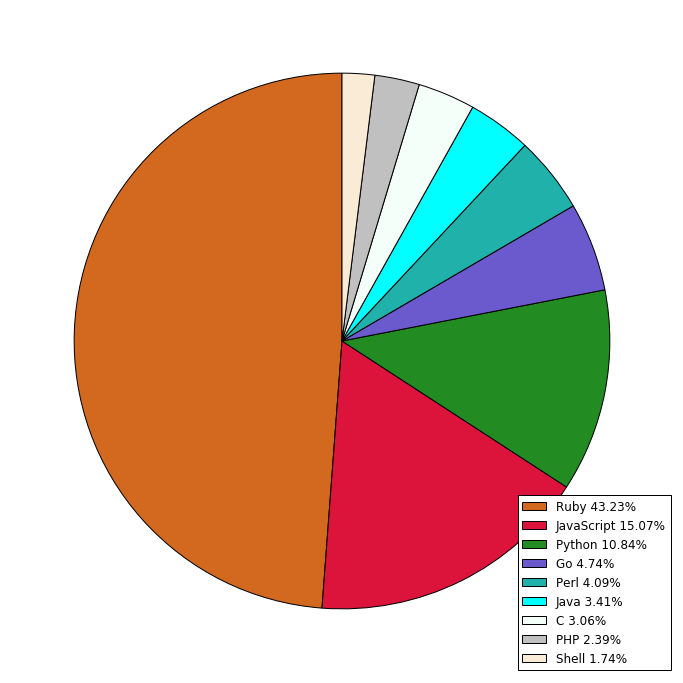

In [7]:
#Creating the list of vertices in largest infomap community
community_sizes_infomap = Counter(nx.get_node_attributes(G,'infomap_community').values())
print community_sizes_infomap
sorted_infomaps = sorted(community_sizes_infomap, key = community_sizes_infomap.get, reverse = True)
print sorted_infomaps
largest_community_infomap = [k for k,v in nx.get_node_attributes(G,'infomap_community').iteritems() if v == sorted_infomaps[0]]
print len(largest_community_infomap)

## Inducing the subgraph of largest infomap community
subgraph_big_infomap = G.subgraph(largest_community_infomap)
community_sizes_lang = Counter(nx.get_node_attributes(subgraph_big_infomap,'lang').values())
num_nodes = subgraph_big_infomap.number_of_nodes()
print community_sizes_lang


## Creating pie-charts
values_langs = sorted(community_sizes_lang.values(),reverse=True)[:9]
values_langs= [x/float(num_nodes)*100 for x in values_langs]
others_percentage = 100 - sum(values_langs)
print others_percentage
print values_langs

sorted_langs = sorted(community_sizes_lang, key=community_sizes_lang.get, reverse = True)
labels_langs = list()
for i,percentage in enumerate(values_langs):
    labels_langs.append(str(sorted_langs[i]) +" "+ "%2.2f" %percentage+"%")
others_string = "Others"+" "+ "%2.2f" %others_percentage+"%"
labels_langs.append(others_string)
print labels_langs

fig = plt.figure(figsize=(12,12))

a=np.random.random(40)
cs=cm.Set1(np.arange(40)/40.)

cols = cnames.values()[39:63]

patches, texts = plt.pie([float(v) for v in values_langs], startangle=90,
           autopct=None, colors = cols)
plt.legend(patches, labels_langs, loc=4)
plt.show()

### Finding influencers using page-rank algorithm

In [8]:
pr = nx.pagerank(G)
pr_sorted = sorted(pr, key=pr.get, reverse= True)
print pr_sorted[:5]
for node in pr_sorted[:5]:
    print G.node[node]['login'], G.node[node]['lang']

['372', '54637', '37669', '5612', '34737']
pombredanne Python
wbond Python
FichteFoll Python
kennethreitz Python
sindresorhus JavaScript


Now lets create a language usage pie chart for top 20K influencers.

['372', '54637', '37669', '5612', '34737']
Counter({u'JavaScript': 5022, u'Python': 3222, u'Ruby': 2983, u'Java': 1691, u'PHP': 1505, u'C': 824, u'C++': 665, u'C#': 488, u'Go': 485, u'Objective-C': 474, u'Scala': 267, u'Perl': 251, u'Haskell': 231, u'Clojure': 227, u'Shell': 226, u'CSS': 140, u'Rust': 110, u'Erlang': 101, u'Emacs Lisp': 98, u'R': 96, u'VimL': 83, u'Lua': 72, u'HTML': 60, u'OCaml': 60, u'Groovy': 58, u'CoffeeScript': 58, u'Julia': 47, u'Dart': 39, u'D': 34, u'DM': 34, u'Swift': 31, u'Puppet': 31, u'F#': 30, u'Haxe': 28, u'Elixir': 27, u'TeX': 21, u'Common Lisp': 21, u'ActionScript': 13, u'Racket': 11, u'Makefile': 9, u'TypeScript': 8, u'ColdFusion': 7, u'Elm': 6, u'Coq': 6, u'PowerShell': 6, u'Matlab': 5, u'Logos': 4, u'XSLT': 4, u'Perl6': 4, u'Pascal': 4, u'Kotlin': 3, u'Standard ML': 3, u'Eiffel': 3, u'ooc': 3, u'Scheme': 3, u'Nimrod': 3, u'PureScript': 3, u'Ceylon': 2, u'Rebol': 2, u'XQuery': 2, u'SuperCollider': 2, u'Objective-J': 2, u'SQF': 2, u'Xojo': 2, u'VHDL': 

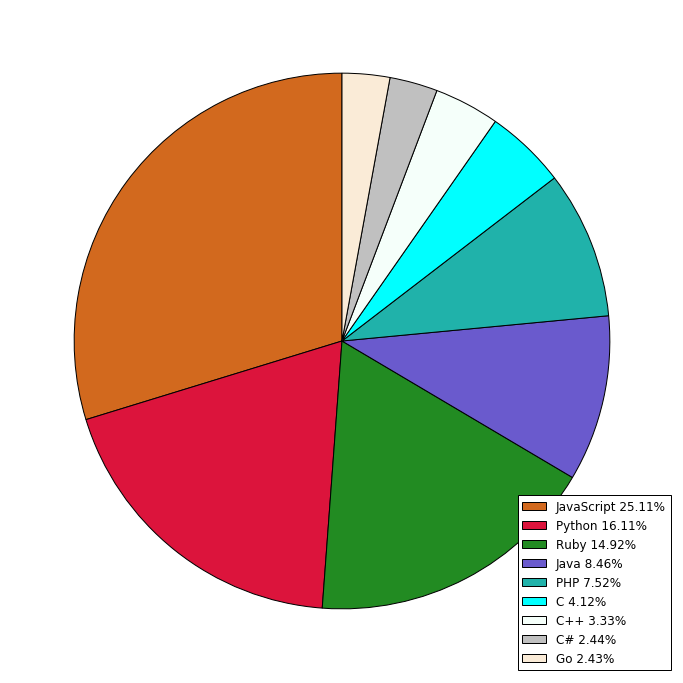

In [9]:
top20k = pr_sorted[:20000]
print top20k[:5]

## Inducing the subgraph of largest infomap community
subgraph_influencers = G.subgraph(top20k)
community_sizes_lang = Counter(nx.get_node_attributes(subgraph_influencers,'lang').values())
num_nodes = subgraph_influencers.number_of_nodes()
print community_sizes_lang


## Creating pie-charts
values_langs = sorted(community_sizes_lang.values(),reverse=True)[:9]
values_langs= [x/float(num_nodes)*100 for x in values_langs]
others_percentage = 100 - sum(values_langs)
print others_percentage
print values_langs

sorted_langs = sorted(community_sizes_lang, key=community_sizes_lang.get, reverse = True)
labels_langs = list()
for i,percentage in enumerate(values_langs):
    labels_langs.append(str(sorted_langs[i]) +" "+ "%2.2f" %percentage+"%")
others_string = "Others"+" "+ "%2.2f" %others_percentage+"%"
labels_langs.append(others_string)
print labels_langs

fig = plt.figure(figsize=(12,12))

a=np.random.random(40)
cs=cm.Set1(np.arange(40)/40.)

cols = cnames.values()[39:63]

patches, texts = plt.pie([float(v) for v in values_langs], startangle=90,
           autopct=None, colors = cols)
plt.legend(patches, labels_langs, loc=4)
plt.show()
subgraph_influencers = G.subgraph(top20k)